In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [45]:
folder_path = "data/Zeitkonstanten"
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

data = {}
timescale_mapping ={'0': 3, '2':30, '4': 300, '6': 3000, '8': 3, 'A': 30,'C':300, 'E': 3000}

for csv_file in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    file_data = np.loadtxt(file_path, delimiter=',', usecols=[3,4])
    data[csv_file.replace('.csv', '')] = file_data

1.2119999499999998
1.21799998
1.9619999
2.1639999000000003


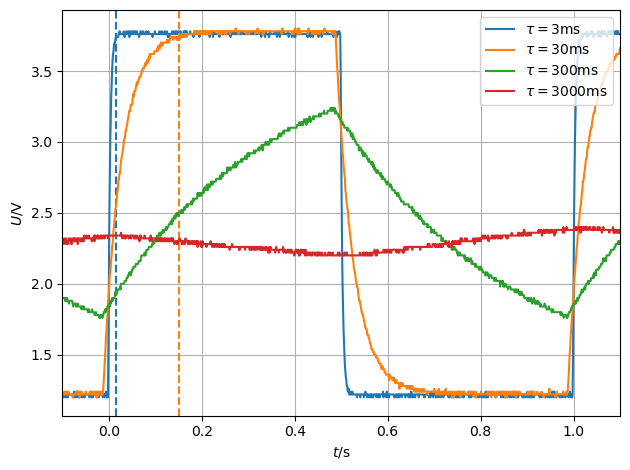

In [46]:
fig, ax = plt.subplots()#, sharey=True)

dts = {'0': 0 , '2':0.01, '4': 0.11, '6':0}


for i, k in enumerate(data):
    t = (data[k][:,0]) #* 250.00001187E-3
    t += dts[k]
    U = data[k][:,1] #* 499.999988824E-3

    low_level = np.mean(U[0:10])
    print(low_level)
    line = ax.plot(t, U, label=f'$\\tau = {timescale_mapping[k]}\\mathrm{{ms}}$')


    # Get the color of the last plot
    last_plot_color = line[0].get_color()
    ax.axvline(5 * timescale_mapping[k] / 1000, c= last_plot_color, linestyle="--")
    ax.legend(loc = 1)

ax.grid()
ax.set(xlim=[-0.1, 1.1])
ax.set(xlabel="$t / \mathrm{s}$", ylabel="$U / \\mathrm{{V}}$")
fig.tight_layout()
fig.savefig('out/lockin_timescale')